# Gene Expression Toggle Switch 

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
# Imports
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

### Bistability (The Toggle Switch)

The synthetic toggle switch from [Gardner et al](https://www.nature.com/articles/35002131) is an engineered gene circuit that leads to bistability. In this case the two stable states correspond to the expression of two different proteins . In the toggle switch, each of the proteins that is expressed represses the expression of the other. This paper was one of the first examples of a completely synthetic engineered gene circuit that was designed with insight from computational modeling.

#### Dimensionless Dynamics

The dynamics of the toggle switch gene circuit system are given in a "dimensionless" form. Here $u$ and $v$ are the two protiens. For our context, $u$ is MYC gene product's protein and $v$ is the product of the MAPK gene. Production is modeled with a repressor Hill function, and degradation is protein concentration dependent. The equation is non-dimensionalized such that the only parameters are $\alpha_{1}$ and $\alpha_{2}$ (the relative expression strengths) and $\beta$ and $\gamma$ the expression ultrasensitivity.

$\large \frac{du}{d\tau}=\frac{\alpha_{1}}{(1+v^{\beta})}-u$

$\large \frac{dv}{d\tau}=\frac{\alpha_{2}}{(1+u^{\gamma})}-v$

#### Nullclines

We can analyze the dynamics of this system by looking at the nullclines. Nullclines are the manifolds of the system along which the rate of change of a variable is equal to 0. This system has two nullclines, one for the rate of change of $u$ and one for the rate of change of $v$. They can be found by setting the rates of change equal to zero in the above equations.

$\large \frac{du}{d\tau}=\frac{\alpha_{1}}{(1+v^{\beta})}-u = 0$

$\large u =  \frac{\alpha_{1}}{(1+v^{\beta})}$

$\large \frac{dv}{d\tau}=\frac{\alpha_{2}}{(1+u^{\gamma})}-v = 0$

$\large v = \frac{\alpha_{2}}{(1+u^{\gamma})}$

By plotting the nullclines we can identify the steady states of the system (where the two lines intersect) and begin to paint a "phase portrait" that describes the system dynamics.


### Exploring System Dynamics In Pre- and Post-Natal Conditions 

Once the nullclines are plotted with MYC protein against MAPK protein, we can simulate how the concentrations of these proteins will respond in pre-natal and post-natal environments. From Hao et al. (2022) we can see that pre-natal environments often have levels of pO2 that are less than 30mmHg, while post-natal environments contain pO2 levels ~90mmHg. In pre-natal states there is a high level of MYC protein and low levels of MAPK protein. To represent these dynamics we begin with concentrations of protein that are high in either the pre-natal or post-natal state, while low in the other. First the differential equation is defined in TS dynamics and then the trajectory is plotted based on the starting concentrations of MYC and MAPK proteins. 

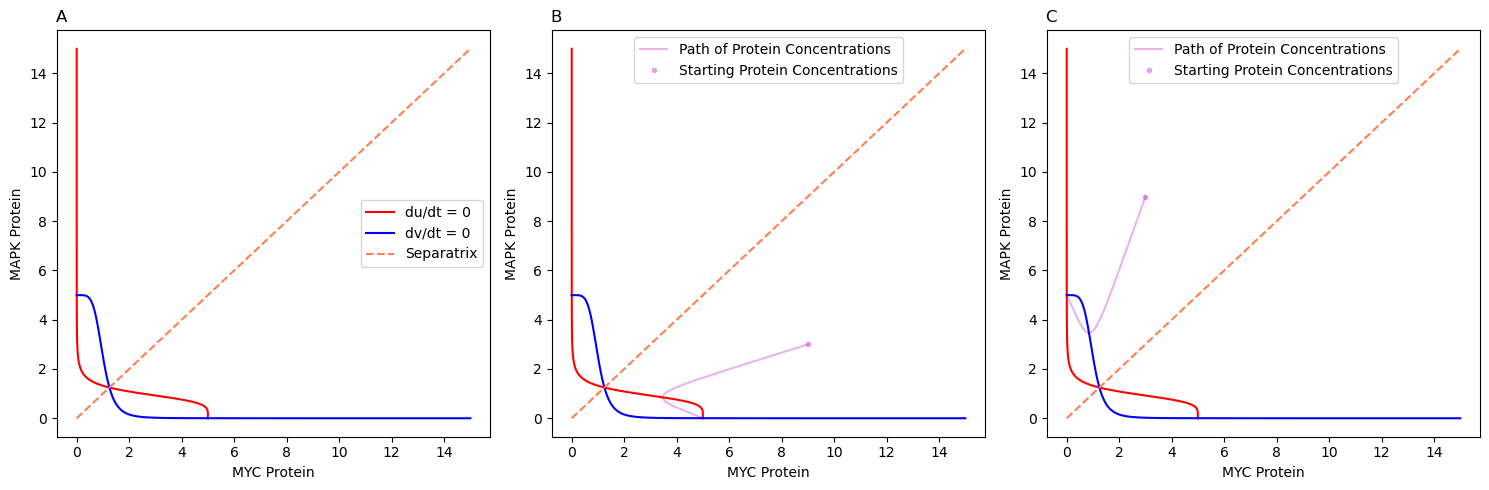

In [33]:
[fig,axs] = plt.subplots(1,3,figsize=[15,5])

# Expression Strength 
alpha_MAPK = 5
alpha_MYC = alpha_MAPK

# Expression ultrasensitivity
beta_MAPK = 5
gamma_MYC = 5

x_max = 15
x = np.linspace(0,x_max,1000)

# nullcline equations 
u = alpha_MAPK/(1+x**beta_MAPK)
v = alpha_MYC/(1+x**gamma_MYC)

axs[0].plot(u,x,'r')
axs[0].plot(x,v,'b')
axs[0].plot(x,x,'coral',linestyle = '--', label = 'Separatrix')
axs[0].set_xlabel('MYC Protein')
axs[0].set_ylabel('MAPK Protein')
axs[0].legend(['du/dt = 0','dv/dt = 0', 'Separatrix']);
axs[0].set_title('A', x = 0.01, y = 1)


# SIMULATING DYNAMICS 

# Define function
def TS_dynamics(t,y,alpha_MAPK,alpha_MYC,beta_MAPK,gamma_MYC):    
    #y[0] = u
    #y[1] = v
    
    dydt = np.zeros(2)
    
    dydt[0] = alpha_MAPK/(1+y[1]**beta_MAPK) - y[0]
    dydt[1] = alpha_MYC/(1+y[0]**gamma_MYC) - y[1]
    
    return dydt

# Initial pO2 Conditions
# This is simulating pre-natal conditions where pO2 is low
y0 = [9,3]

# time span
t = np.linspace(0,10,1000)
tspan = [t[0],t[-1]]
ode_sol = solve_ivp(lambda t,y:TS_dynamics(t,y,alpha_MAPK,alpha_MYC,beta_MAPK,gamma_MYC),tspan,y0,t_eval=t)

# Plot dynamics
axs[1].plot(ode_sol.y[0],ode_sol.y[1],'m',alpha=0.3)
axs[1].plot(ode_sol.y[0][0],ode_sol.y[1][0],'m.',alpha=0.3) #starting point

# Plot nullclines
axs[1].plot(u,x,'r')
axs[1].plot(x,v,'b')
axs[1].plot(x,x,'coral',linestyle = '--',label='Separatrix')
axs[1].set_xlabel('MYC Protein')
axs[1].set_ylabel('MAPK Protein')
axs[1].legend(['Path of Protein Concentrations','Starting Protein Concentrations'])
axs[1].set_title('B', x = 0.01, y = 1)

# Initial pO2 Conditions
# Stimulating dynamics where pO2 is high 
y1 = [3,9]

# time span
t = np.linspace(0,10,1000)
tspan = [t[0],t[-1]]
ode_sol = solve_ivp(lambda t,y:TS_dynamics(t,y,alpha_MAPK,alpha_MYC,beta_MAPK,gamma_MYC),tspan,y1,t_eval=t)

# Plot dynamics
axs[2].plot(ode_sol.y[0],ode_sol.y[1],'m',alpha=0.3)
axs[2].plot(ode_sol.y[0][0],ode_sol.y[1][0],'m.',alpha=0.3) #starting point

# Plot nullclines
axs[2].plot(u,x,'r')
axs[2].plot(x,v,'b')
axs[2].plot(x,x,'coral',linestyle = '--')
axs[2].set_xlabel('MYC Protein')
axs[2].set_ylabel('MAPK Protein')
axs[2].legend(['Path of Protein Concentrations','Starting Protein Concentrations'])
axs[2].set_title('C', x = 0.01, y = 1)

plt.tight_layout()

plt.savefig('Nullclines_and_dynamics.png')

### Gene Product Concentration in Response to pO2 Levels 

To get a more accurate representation of how MYC and MAPK protein concentrations change during the transition from pre-natal to post-natal, here we assign equations to states where the pO2 is below 30mmHg (pre-natal environments) and when it is 30>pO2>90 mmHg (post-natal environments). 

To achieve this we created piecewise functions with conditions of greater or less 30 mmHg of pO2. Prior to the pO2 increasing in post-natal environments, we see the steady expression of MYC with zero expression of MAPK. All expression levels are based on a scale with respect to their maximum concentrations so we could investigate the percent of each protein being expressed, with 1.0 being equal to 100% expression. Once the system passes 30 mmHg of pO2, there is a shift in the dynamics of the protein concentrations. To display this transition we decided to use exponential functions in our piecewise equations since the inhibition of one gene and the expression of another result in protein concentrations changing rapidly at first and then approaching a steady state where the maximum/minimum amount of protein is reached. 

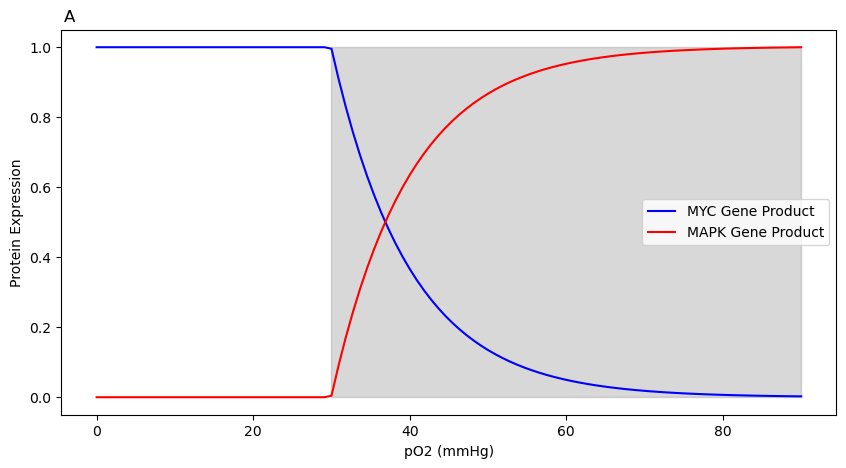

In [32]:
[fig,axs] = plt.subplots(1,1,figsize=[10,5])

x = np.linspace(0,90,100) # Representing oxygen concentration changing after birth 
y = np.linspace(0,100,100) # Protein expression 

# MYC Concentration vs. pO2
myc_conc = np.piecewise(x, [x<30, x>=30], [lambda x: 5.5, lambda x: 110*(np.exp(-0.1*x))])
myc_percent = myc_conc / np.max(myc_conc)

#MAPK Concentration vs. pO2
mapk_conc = np.piecewise(x, [x<30, x>=30], [lambda x:0, lambda x:-110*(np.exp(-0.1*x))+5.5]) 
mapk_percent = mapk_conc / np.max(mapk_conc)

# plotting
axs.plot(x,myc_percent,'b', label = 'MYC Gene Product')
axs.plot(x,mapk_percent,'r',label='MAPK Gene Product')
axs.set_xlabel('pO2 (mmHg)')
axs.set_ylabel('Protein Expression')
axs.legend()
axs.set_title('A', x = 0.01, y = 1)

# Fill between code 
pre_natal = [30,30]
post_natal = [90,90]
y_min_max = [0,1]
axs.fill_betweenx(y_min_max, pre_natal, post_natal, color = 'grey', alpha = 0.3)

plt.savefig('GeneProducts_vs_pO2')